In [15]:
import librosa
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.transforms as mpt

In [16]:
y, sr = librosa.load("ptk_2.wav")
truncated_y = y[32000:]

In [17]:
sos = signal.butter(4, 3, 'low', fs=sr, output='sos')
filtered = signal.sosfilt(sos, truncated_y)

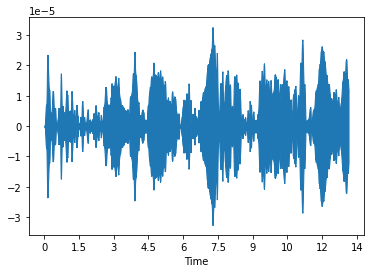

In [18]:
librosa.display.waveshow(filtered)

[Text(0.5, 1.0, 'Auto-correlation'), Text(0.5, 0, 'Lag (frames)')]

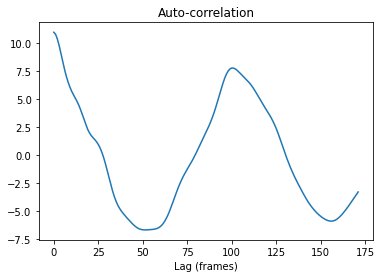

In [19]:
odf = librosa.onset.onset_strength(y=truncated_y, sr=sr, hop_length=512)
ac = librosa.autocorrelate(truncated_y, max_size=4 * sr // 512)
fig, ax = plt.subplots()
ax.plot(ac)
ax.set(title='Auto-correlation', xlabel='Lag (frames)')

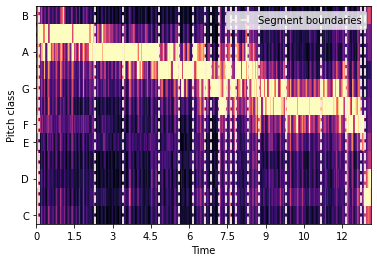

In [20]:
chroma = librosa.feature.chroma_cqt(y=truncated_y, sr=sr)
bounds = librosa.segment.agglomerative(chroma, 20)
bound_times = librosa.frames_to_time(bounds, sr=sr)

fig, ax = plt.subplots()
trans = mpt.blended_transform_factory(
            ax.transData, ax.transAxes)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.vlines(bound_times, 0, 1, color='linen', linestyle='--',
          linewidth=2, alpha=0.9, label='Segment boundaries',
          transform=trans)
ax.legend()